In [1]:
import pandas as pn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
import seaborn as sns
import pandas as pd

In [3]:
data = pd.read_csv("Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
data.shape

(10000, 14)

In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [48]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
data_cleaned = data.dropna()

data_cleaned

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Categorical variables: 3
Integer variables: 0
Float variables: 2


C:\Users\kishan'pc\AppData\Local\Temp\ipykernel_13608\1857744364.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),


<Axes: >

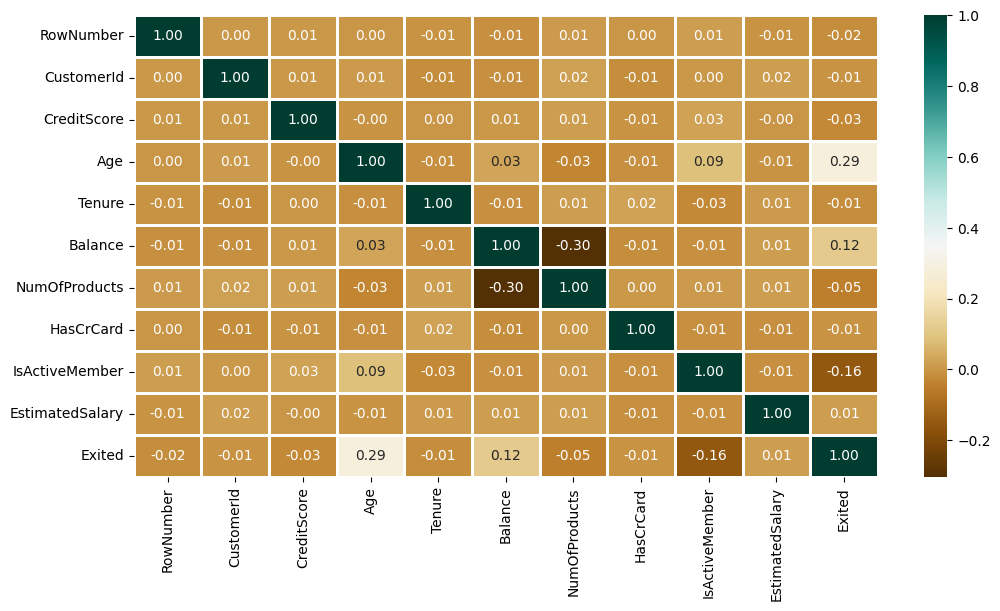

In [8]:
#data preprocessing

obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

#Exploratory analysis using heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [9]:
#dropped columns which doesn't impact the estimation
df = pd.DataFrame(data_cleaned)

column_to_drop = ['RowNumber', 'CustomerId', 'Surname']

df_1 = df.drop(columns=column_to_drop, axis = 1)
df_1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
df_1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Variable name: CreditScore


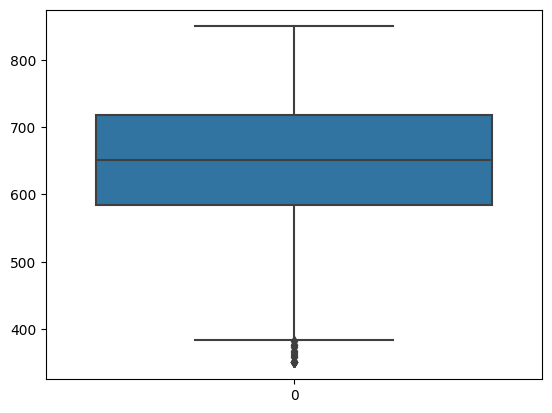

Variable name: Age


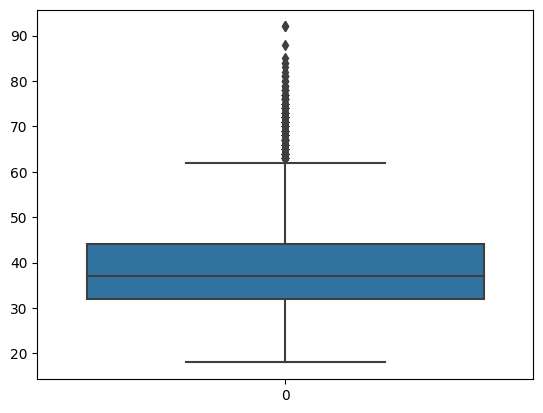

Variable name: Tenure


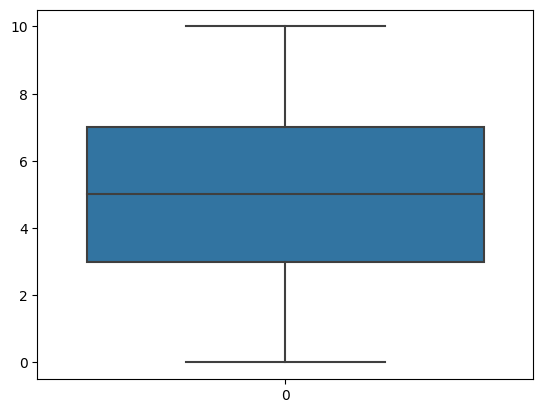

Variable name: Balance


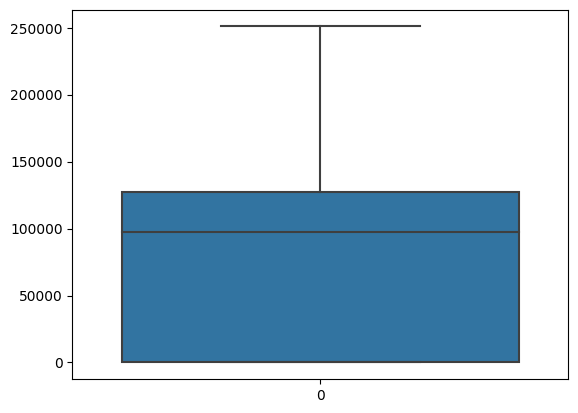

Variable name: NumOfProducts


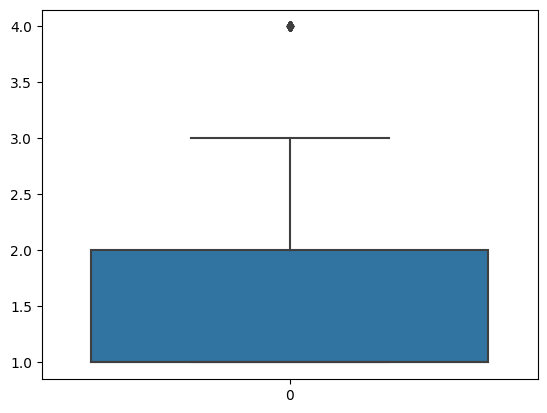

Variable name: HasCrCard


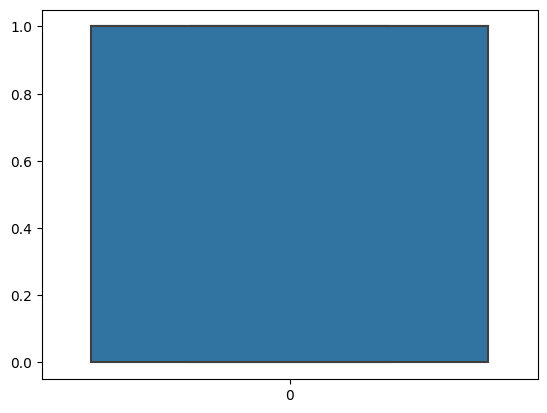

Variable name: IsActiveMember


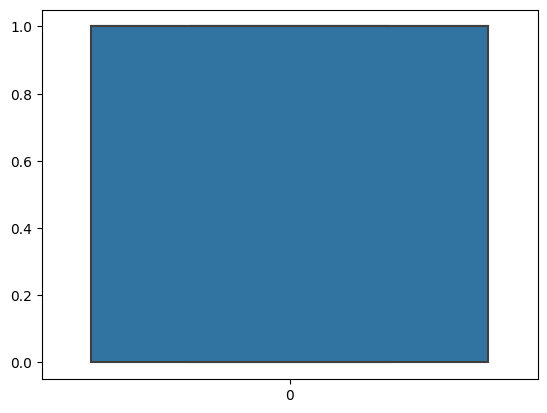

Variable name: EstimatedSalary


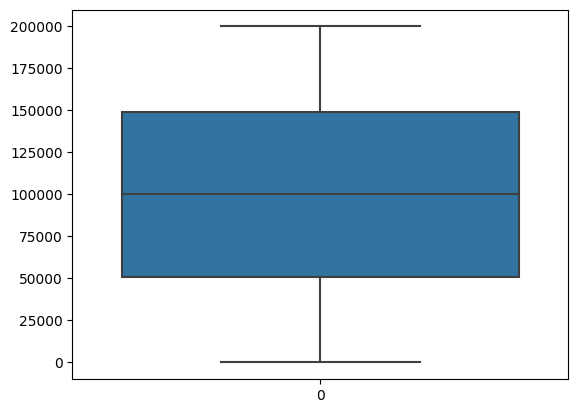

Variable name: Exited


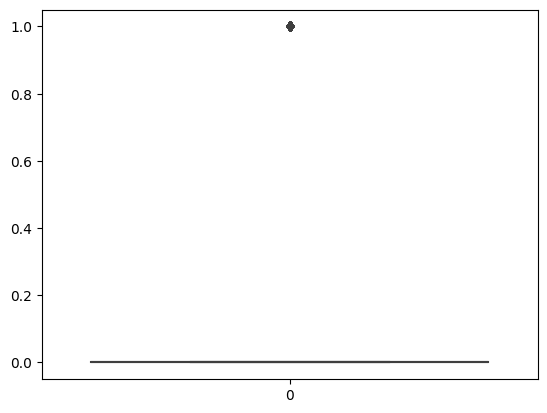

In [11]:
for i in df_1.select_dtypes(include=['int','float64']):
    print('Variable name:', i)
    sns.boxplot(df_1[i])
    plt.show()

CreditScore          1146.8000
Age                    82.4000
Tenure                 19.8000
Balance            536105.8080
NumOfProducts           5.2000
HasCrCard               4.2000
IsActiveMember          4.2000
EstimatedSalary    464223.8875
Exited                  0.0000
dtype: float64
CreditScore           155.200
Age                    -6.400
Tenure                 -9.800
Balance           -408461.568
NumOfProducts          -2.200
HasCrCard              -3.200
IsActiveMember         -3.200
EstimatedSalary   -263833.530
Exited                  0.000
dtype: float64


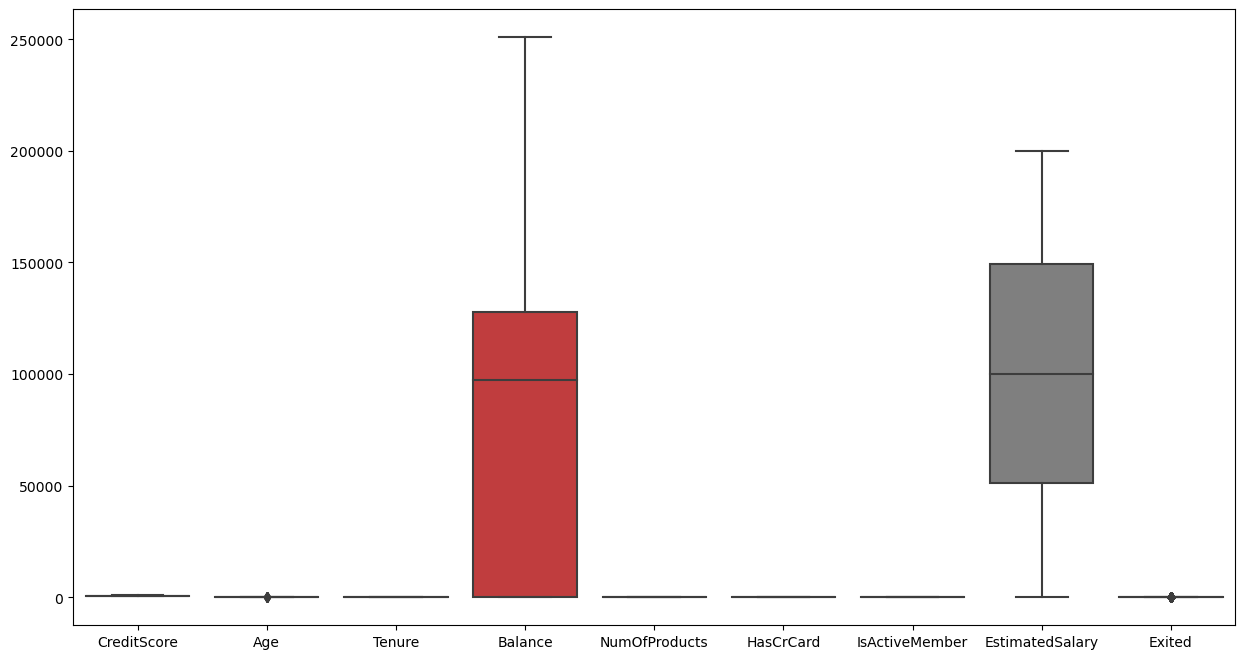

In [54]:
#Removing outliers using IQR method
plt.figure(figsize= (15,8))
sns.boxplot(data = df_1, whis=3.2)
q1 = df_1.quantile(0.25)
q3 = df_1.quantile(0.75)
iqr = q3 - q1
iqr

ul = q3 + 3.2 * (iqr)
ll = q1 - 3.2 * (iqr)
print(ul)
print(ll)

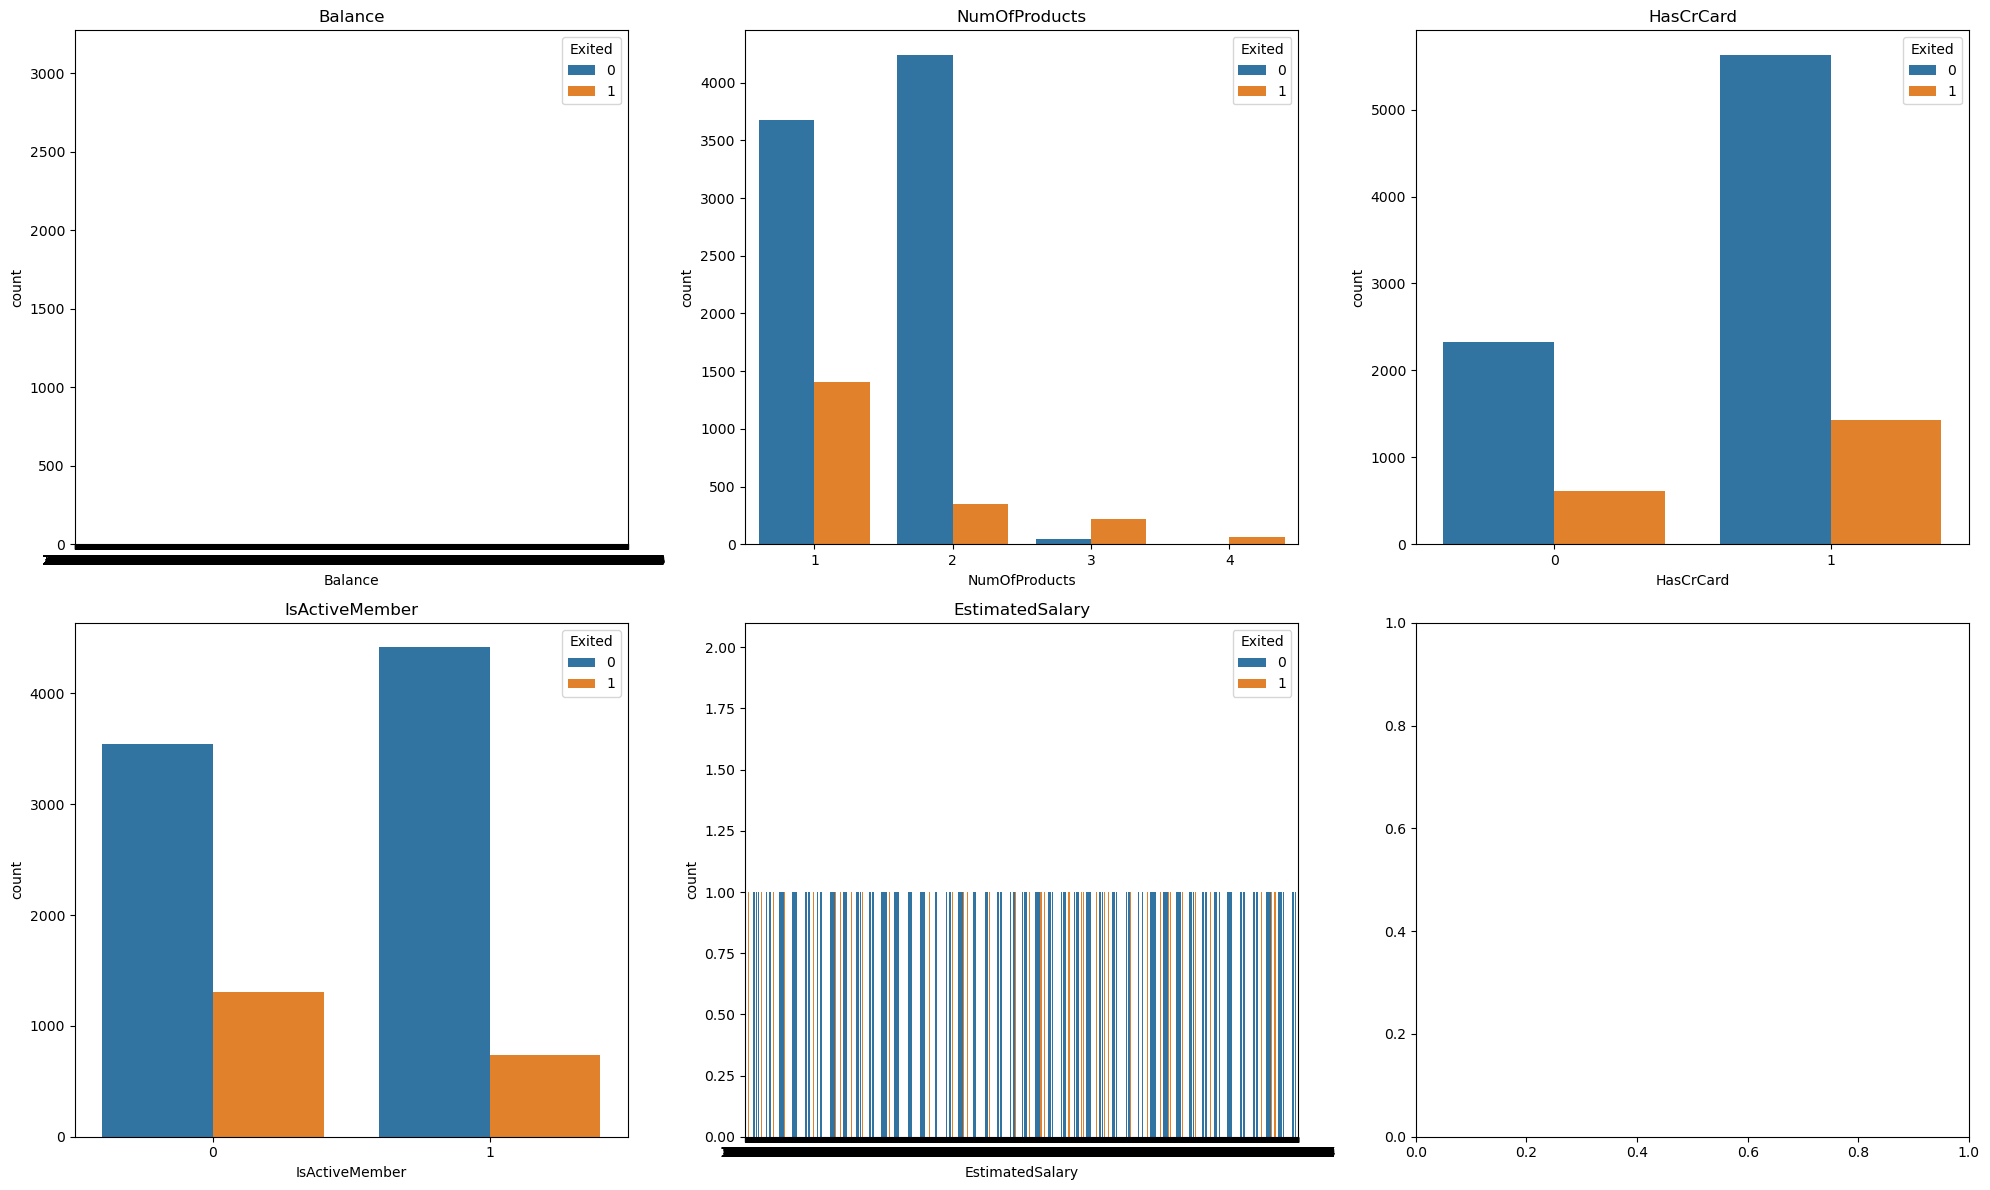

In [55]:
fig, axarr = plt.subplots(2, 3, figsize=(20, 12))
plot_settings = [
    ('Balance', axarr[0][0]),
    ('NumOfProducts', axarr[0][1]),
    ('HasCrCard', axarr[0][2]),
    ('IsActiveMember', axarr[1][0]),
    ('EstimatedSalary', axarr[1][1])
]

# Generate the count plots
for i, (column, ax) in enumerate(plot_settings):
    sns.countplot(x=column, hue='Exited', data=df_1, ax=ax)
    ax.set_title(column)

# Adjusting the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()



In [12]:
#Performing one-hot encoding for the data

#df_1 = pd.DataFrame(data_cleaned)

# Select the categorical columns for one-hot encoding
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df_1, columns=categorical_columns)

# Display the encoded DataFrame
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,1,0,0,1,0,0,1,0,1
1,608,41,1,83807.86,1,112542.58,0,0,0,1,1,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,1,0,0,1,0,0,1,1,0
3,699,39,1,0.00,2,93826.63,0,1,0,0,1,0,1,0,1,0
4,850,43,2,125510.82,1,79084.10,0,0,0,1,1,0,0,1,0,1


In [13]:
df_encoded.shape

(10000, 16)

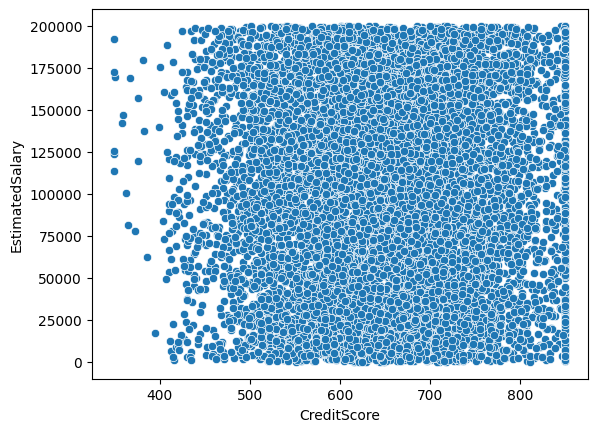

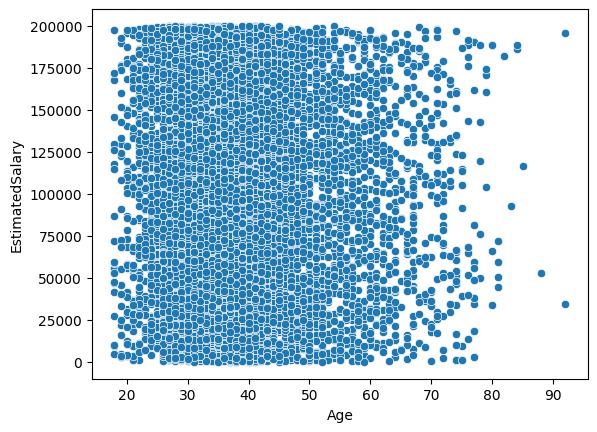

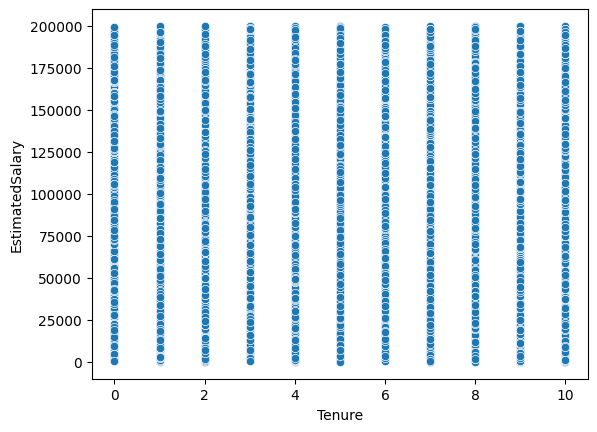

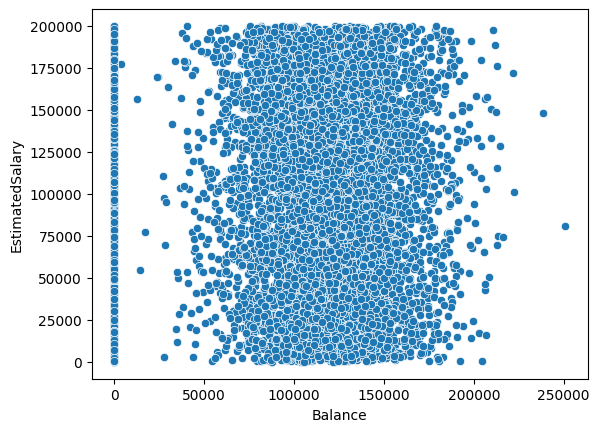

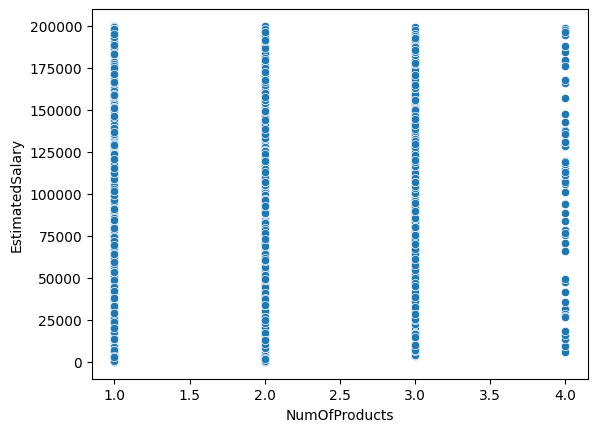

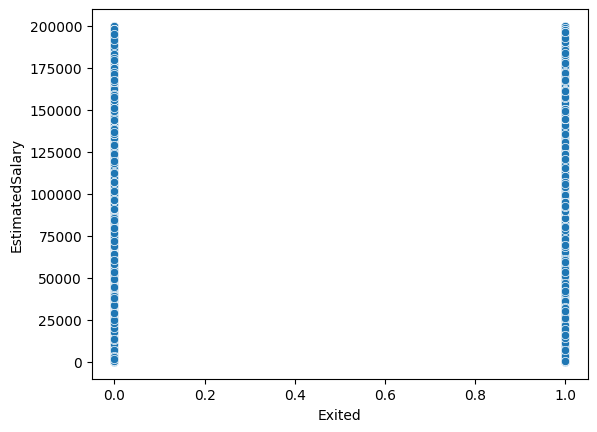

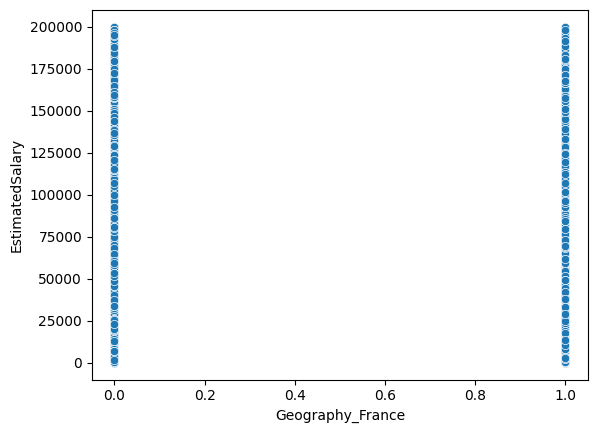

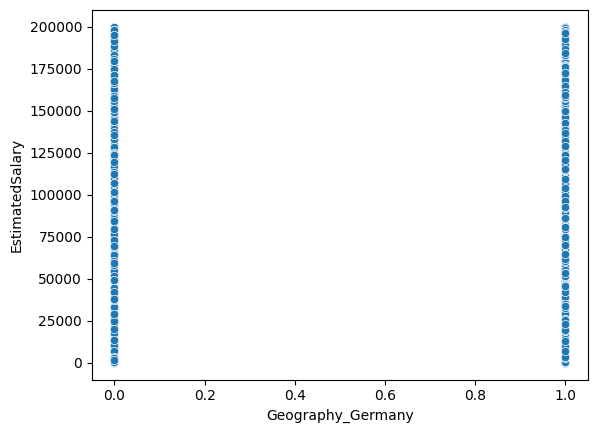

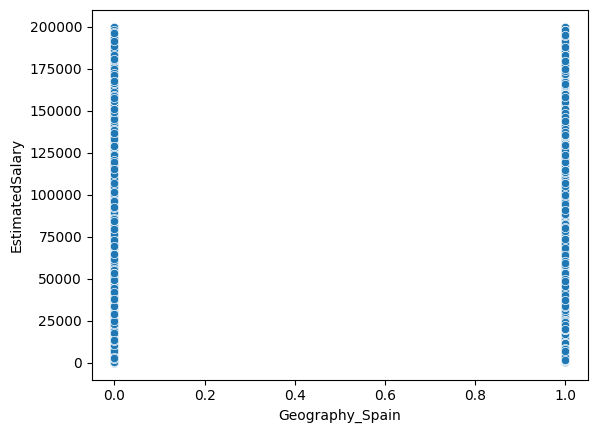

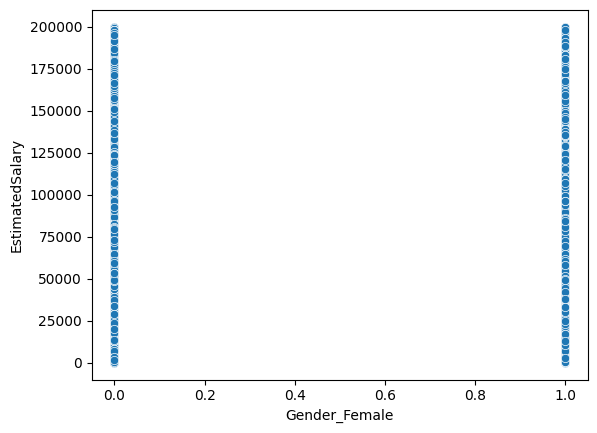

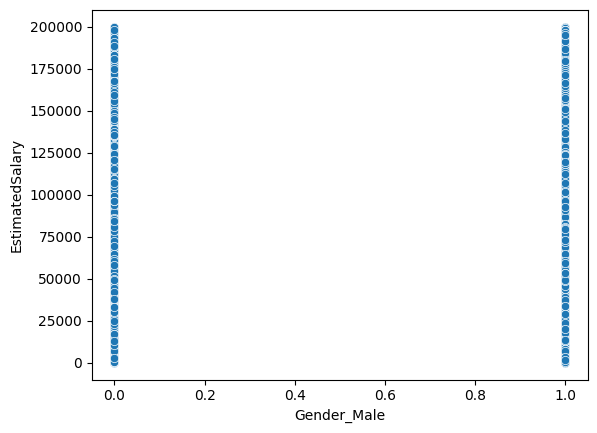

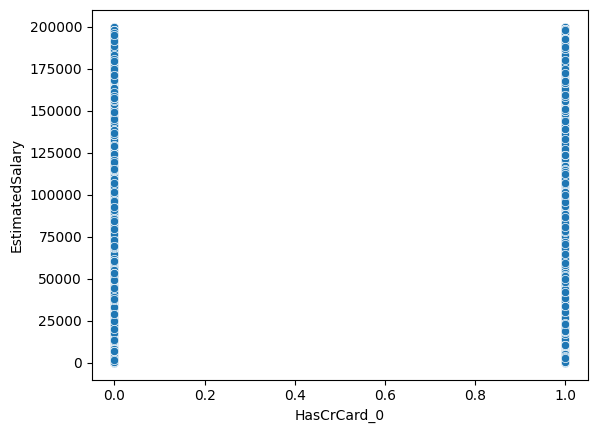

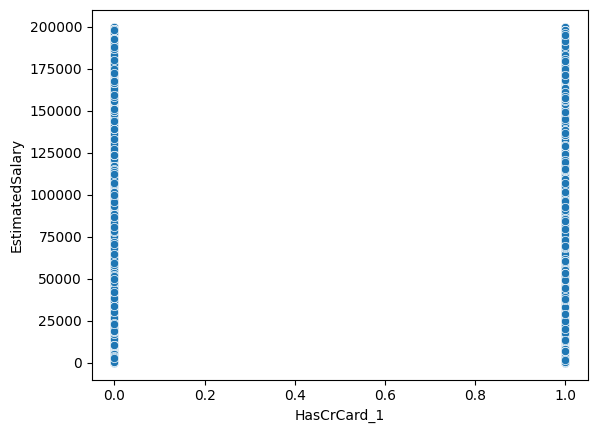

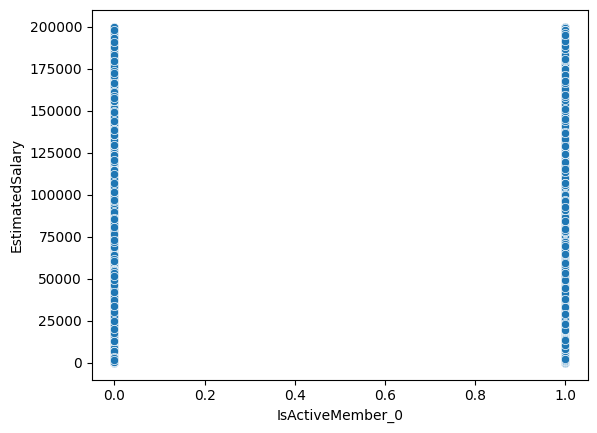

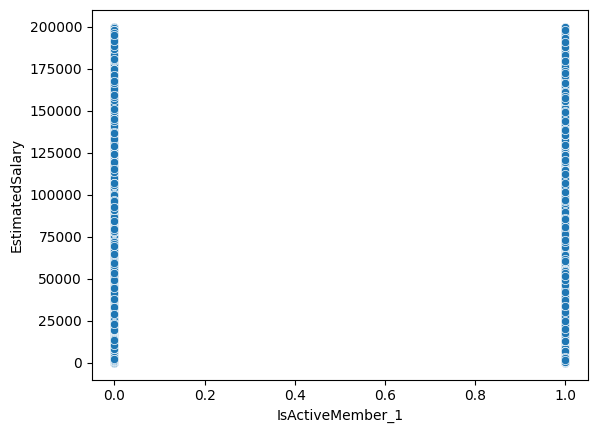

In [131]:
#dropped columns which doesn't impact the estimation and plotting scatter plot for rest ot the dependable variable
df_1 = pd.DataFrame(df_encoded)

target_variable = 'EstimatedSalary'

for column in df_1.columns:
    if column != target_variable:
        sns.scatterplot(data=df_1, x=column, y=target_variable)
        plt.show()

In [132]:
df_1

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,1,0,0,1,0,0,1,0,1
1,608,41,1,83807.86,1,112542.58,0,0,0,1,1,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,1,0,0,1,0,0,1,1,0
3,699,39,1,0.00,2,93826.63,0,1,0,0,1,0,1,0,1,0
4,850,43,2,125510.82,1,79084.10,0,0,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64,0,1,0,0,0,1,0,1,1,0
9996,516,35,10,57369.61,1,101699.77,0,1,0,0,0,1,0,1,0,1
9997,709,36,7,0.00,1,42085.58,1,1,0,0,1,0,1,0,0,1
9998,772,42,3,75075.31,2,92888.52,1,0,1,0,0,1,0,1,1,0


In [133]:
#splited the data into test and train. 30% for train and 70% for test
x1=df_1['CreditScore']
y1=df_1['EstimatedSalary']
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.3, random_state = 23)

In [134]:
x1_train

9391    846
2730    670
1189    701
7066    729
8194    632
       ... 
347     643
6175    503
9704    625
9256    765
8787    689
Name: CreditScore, Length: 7000, dtype: int64

In [136]:
#changing the  train data to 1 D
x1_train = np.array(x1_train).reshape(-1,1)
x1_train.flatten()

array([846, 670, 701, ..., 625, 765, 689], dtype=int64)

In [137]:
#changing the train data to 1 D
y1_train = np.array(y1_train).reshape(-1,1)
y1_train.flatten()

array([ 96202.44,   3154.95, 153537.55, ..., 157072.91,   9087.81,
       167969.15])

# Linear Regression

In [165]:
#calculating the linear regression
lr = LinearRegression()
lr.fit(x1_train,y1_train)

LinearRegression()

In [166]:
c = lr.intercept_
c

array([103261.70036324])

In [167]:
m=lr.coef_
m

array([[-5.53913693]])

In [150]:
y_pred_train = m*x1_train + c
y_pred_train.flatten()

array([98575.59051719, 99550.47861755, 99378.7653726 , ...,
       99799.73977957, 99024.26060883, 99445.23501581])

Text(0.5, 1.0, 'Actual vs Predicted')

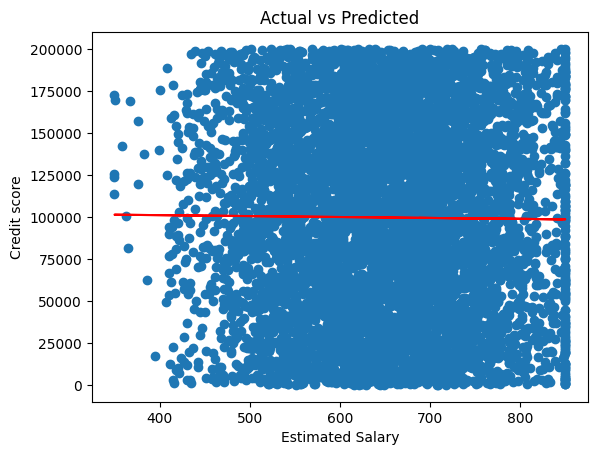

In [151]:
#plotting the train data agains the predicted data. The red line is the predictred data
plt.scatter(x1_train, y1_train)
plt.plot(x1_train,y_pred_train, color ='red')
plt.xlabel("Estimated Salary")
plt.ylabel("Credit score")
plt.title('Actual vs Predicted')

In [157]:
#Prediction for the test data
x1_test = np.array(x1_test).reshape(-1,1)
y1_test = np.array(y1_test).reshape(-1,1)

y_pred_test = m*x1_test + c
y_pred_test.flatten()

array([100187.47936495,  99029.79974577, 100680.46255206, ...,
       100425.6622531 ,  99251.36522312,  99772.04409491])

Text(0.5, 1.0, 'Actual vs Predicted')

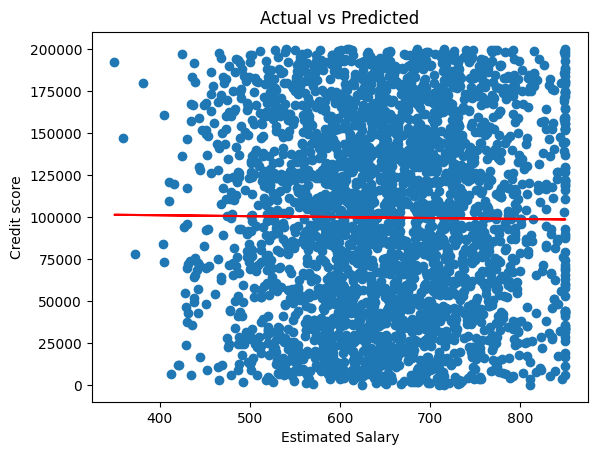

In [158]:
plt.scatter(x1_test, y1_test)
plt.plot(x1_test,y_pred_test, color ='red')
plt.xlabel("Estimated Salary")
plt.ylabel("Credit score")
plt.title('Actual vs Predicted')

In [160]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [161]:
r_square_score = r2_score(y1_test,y_pred_test)
r_square_score

-0.0010460527100468742

In [162]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y1_test,y_pred_test)
mse

3254944904.5334454

In [163]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y1_test,y_pred_test))
rmse

57052.12445241146

In [164]:
print("Mean Squared Error:", mse)
print("R^2 Score:", r_square_score)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 3254944904.5334454
R^2 Score: -0.0010460527100468742
Root Mean Squared Error: 57052.12445241146


# Random Forest Regressor

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
y_r = df_encoded['Exited'].astype('int')
y_r

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int32

In [88]:
x_r = df_encoded.drop("Exited", axis = 1)
x_r

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,0,0,1,0,0,1,0,1
1,608,41,1,83807.86,1,112542.58,0,0,1,1,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,0,0,1,0,0,1,1,0
3,699,39,1,0.00,2,93826.63,1,0,0,1,0,1,0,1,0
4,850,43,2,125510.82,1,79084.10,0,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64,1,0,0,0,1,0,1,1,0
9996,516,35,10,57369.61,1,101699.77,1,0,0,0,1,0,1,0,1
9997,709,36,7,0.00,1,42085.58,1,0,0,1,0,1,0,0,1
9998,772,42,3,75075.31,2,92888.52,0,1,0,0,1,0,1,1,0


In [89]:
x_r_train, x_r_test, y_r_train, y_r_test = train_test_split(x_r, y_r, test_size =0.3, random_state=20)
x_r_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
8094,614,66,2,0.00,2,180082.70,0,0,1,0,1,1,0,0,1
1008,444,45,6,0.00,1,130009.85,1,0,0,0,1,0,1,1,0
8016,569,41,2,0.00,2,134272.57,0,0,1,0,1,0,1,1,0
1964,800,40,5,97764.41,1,98640.15,1,0,0,1,0,0,1,1,0
9844,658,40,5,143566.12,1,189607.71,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,686,43,2,134896.03,1,97847.05,0,1,0,0,1,0,1,0,1
9620,561,37,4,101470.29,1,88838.14,0,0,1,0,1,1,0,0,1
7068,699,54,3,111009.32,1,155905.79,0,1,0,1,0,0,1,0,1
7391,430,31,5,0.00,1,95655.16,1,0,0,0,1,0,1,1,0


In [90]:
from sklearn.ensemble import RandomForestClassifier
my_model = RandomForestClassifier(n_estimators = 10, random_state=30)

In [91]:
rf = my_model.fit(x_r_train, y_r_train)
rf

RandomForestClassifier(n_estimators=10, random_state=30)

In [92]:
y_r_pred = my_model.predict(x_r_test)
y_r_pred

array([0, 0, 0, ..., 0, 0, 0])

In [93]:
mse = mean_squared_error(y_r_test, y_r_pred)
r_square_score = r2_score(y_r_test, y_r_pred)
rmse = np.sqrt(mean_squared_error(y_r_test,y_r_pred))

In [94]:
print("Mean Squared Error:", mse)
print("R^2 Score:", r_square_score)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 0.143
R^2 Score: 0.07944589366348354
Root Mean Squared Error: 0.3781534080237807


In [95]:
len(y_r_pred)

3000

In [96]:
from sklearn.metrics import confusion_matrix,accuracy_score 

cm = confusion_matrix(y_r_pred, y_r_test)
cm


array([[2332,  338],
       [  91,  239]], dtype=int64)

In [97]:
acc_score=accuracy_score(y_r_pred, y_r_test)
acc_score

0.857

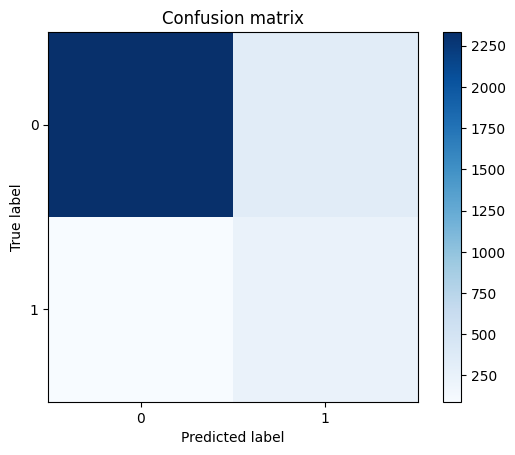

In [98]:
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap=plt.cm.Blues)

ax.set_xticks(np.arange(cm.shape[1]))
ax.set_yticks(np.arange(cm.shape[0]))
ax.set_xticklabels(['0', '1'])
ax.set_yticklabels(['0', '1'])
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion matrix')
fig.colorbar(im)

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
y_d = df_encoded['Exited'].astype('int')
y_d

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int32

In [105]:
x_d = df_encoded.drop("Exited", axis = 1)
x_d

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,0,0,1,0,0,1,0,1
1,608,41,1,83807.86,1,112542.58,0,0,1,1,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,0,0,1,0,0,1,1,0
3,699,39,1,0.00,2,93826.63,1,0,0,1,0,1,0,1,0
4,850,43,2,125510.82,1,79084.10,0,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64,1,0,0,0,1,0,1,1,0
9996,516,35,10,57369.61,1,101699.77,1,0,0,0,1,0,1,0,1
9997,709,36,7,0.00,1,42085.58,1,0,0,1,0,1,0,0,1
9998,772,42,3,75075.31,2,92888.52,0,1,0,0,1,0,1,1,0


In [107]:
x_d_train, x_d_test, y_d_train, y_d_test = train_test_split(x_d, y_d, test_size =0.2, random_state=20)
x_d_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
4661,780,43,0,0.00,1,15705.27,1,0,0,1,0,1,0,0,1
7168,507,33,7,0.00,2,85411.01,1,0,0,0,1,0,1,0,1
1031,631,22,3,0.00,2,30781.77,1,0,0,1,0,1,0,1,0
6746,640,39,3,0.00,1,105997.25,0,0,1,0,1,0,1,0,1
9228,699,39,2,109724.38,1,180022.39,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,686,43,2,134896.03,1,97847.05,0,1,0,0,1,0,1,0,1
9620,561,37,4,101470.29,1,88838.14,0,0,1,0,1,1,0,0,1
7068,699,54,3,111009.32,1,155905.79,0,1,0,1,0,0,1,0,1
7391,430,31,5,0.00,1,95655.16,1,0,0,0,1,0,1,1,0


In [117]:
x_d_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
9957,633,25,1,0.00,1,100598.98,1,0,0,0,1,0,1,1,0
1687,850,37,4,137204.77,1,28865.59,0,0,1,0,1,0,1,0,1
2116,701,44,7,0.00,2,23425.78,1,0,0,0,1,0,1,1,0
231,610,40,0,0.00,2,62232.60,1,0,0,0,1,0,1,1,0
2780,778,40,8,104291.41,2,117507.11,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7176,495,39,8,120252.02,2,10160.23,0,1,0,0,1,0,1,0,1
5050,703,32,1,125685.79,1,56246.72,1,0,0,0,1,0,1,0,1
7910,561,28,6,123692.00,1,70548.96,0,0,1,0,1,0,1,0,1
7023,524,29,9,144287.60,2,32063.30,0,1,0,0,1,0,1,1,0


In [109]:
dt = DecisionTreeClassifier()
dt.fit(x_d_train, y_d_train)

DecisionTreeClassifier()

In [120]:
y_pred_R = dt.predict(x_d_test)
y_pred_R

array([0, 0, 0, ..., 0, 0, 0])

In [122]:
mse_r = mean_squared_error(y_d_test, y_pred_R)
rmse_r = mean_squared_error(y_d_test, y_pred_R, squared=False)
rmse_r = r2_score(y_d_test, y_pred_R)

In [123]:
print("Mean Squared Error:", mse_r)
print("R^2 Score:",rmse_r )
print("Root Mean Squared Error:", rmse_r)

Mean Squared Error: 0.197
R^2 Score: 0.4438468204234429
Root Mean Squared Error: 0.4438468204234429


In [125]:
cm_d = confusion_matrix(y_pred_R, y_d_test)
cm_d


array([[1413,  184],
       [ 210,  193]], dtype=int64)

In [127]:
acc_score_d=accuracy_score(y_pred_R, y_d_test)
acc_score_d

0.803

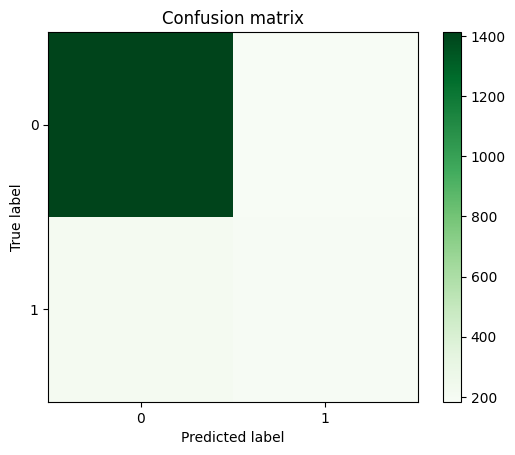

In [129]:
fig, ax = plt.subplots()
im = ax.imshow(cm_d, cmap=plt.cm.Greens)

ax.set_xticks(np.arange(cm.shape[1]))
ax.set_yticks(np.arange(cm.shape[0]))
ax.set_xticklabels(['0', '1'])
ax.set_yticklabels(['0', '1'])
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion matrix')
fig.colorbar(im)